In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate synthetic data
num_records = 1000

# Generate random dates within a specific range
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)
date_list = [start_date + timedelta(days=np.random.randint((end_date - start_date).days)) for _ in range(num_records)]

crime_data = pd.DataFrame({
    'Date': date_list,
    'Time': [datetime.strftime(datetime.strptime(str(random.randint(0, 23)), "%H"), "%I:%M %p") for _ in range(num_records)],
    'DayOfWeek': [date.strftime('%A') for date in date_list],
    'CrimeType': np.random.choice(['Burglary', 'Assault', 'Robbery', 'Theft'], size=num_records),
    'Severity': np.random.choice(['Low', 'Medium', 'High'], size=num_records),
    'WeaponUsed': np.random.choice(['None', 'Firearm', 'Knife', 'Other'], size=num_records),
    'VictimAge': np.random.randint(18, 70, size=num_records),
    'VictimGender': np.random.choice(['Male', 'Female'], size=num_records),
    'SuspectAge': np.random.randint(18, 70, size=num_records),
    'SuspectGender': np.random.choice(['Male', 'Female'], size=num_records),
    'Location': np.random.choice(['Urban', 'Suburban', 'Rural'], size=num_records),
    'Temperature': np.random.uniform(20, 100, size=num_records),
    'PopulationDensity': np.random.uniform(50, 1000, size=num_records),
    'PolicePatrolFrequency': np.random.choice(['Low', 'Medium', 'High'], size=num_records),
    'ResponseTime': np.random.uniform(5, 30, size=num_records),
    'CrimeRate': np.random.uniform(0, 1, size=num_records)  # This is a synthetic crime rate for illustration
})

# Display the generated dataset
print(crime_data.head())


        Date      Time  DayOfWeek CrimeType Severity WeaponUsed  VictimAge  \
0 2022-04-13  08:00 PM  Wednesday     Theft     High      Other         47   
1 2022-12-15  03:00 AM   Thursday   Assault     High      Knife         61   
2 2022-09-28  12:00 AM  Wednesday  Burglary   Medium      Knife         51   
3 2022-04-17  11:00 PM     Sunday     Theft     High    Firearm         49   
4 2022-03-13  08:00 AM     Sunday   Assault   Medium      Knife         20   

  VictimGender  SuspectAge SuspectGender  Location  Temperature  \
0         Male          33          Male     Urban    27.735565   
1       Female          62          Male  Suburban    77.636539   
2         Male          64        Female     Urban    42.546000   
3       Female          65        Female     Rural    34.744112   
4       Female          44        Female     Urban    23.148950   

   PopulationDensity PolicePatrolFrequency  ResponseTime  CrimeRate  
0         968.261232                  High     21.587552  

In [ ]:
import numpy as np
column_names = ['VictimAge', 'SuspectAge', 'Temperature', 'PopulationDensity', 'ResponseTime', 'CrimeRate']
for column in column_names:
    null_indices = np.random.choice(crime_data.index, size=120, replace=False)
    crime_data.loc[null_indices, column] = np.nan


In [ ]:
#Null values in each column
null_counts = crime_data.isnull().sum()
print("\nNull Value Counts:")
print(null_counts)



Null Value Counts:
Date                       0
Time                       0
DayOfWeek                  0
CrimeType                  0
Severity                   0
WeaponUsed                 0
VictimAge                399
VictimGender               0
SuspectAge               399
SuspectGender              0
Location                   0
Temperature              401
PopulationDensity        401
PolicePatrolFrequency      0
ResponseTime             399
CrimeRate                399
dtype: int64


In [ ]:
#Details
print("Shape of crime_data:", crime_data.shape)
print("\nData types of each column:")
print(crime_data.dtypes)


Shape of crime_data: (1000, 16)

Data types of each column:
Date                     datetime64[ns]
Time                             object
DayOfWeek                        object
CrimeType                        object
Severity                         object
WeaponUsed                       object
VictimAge                       float64
VictimGender                     object
SuspectAge                      float64
SuspectGender                    object
Location                         object
Temperature                     float64
PopulationDensity               float64
PolicePatrolFrequency            object
ResponseTime                    float64
CrimeRate                       float64
dtype: object


In [ ]:
import pandas as pd
import numpy as np
df1 = crime_data.copy()
# Performing mean/median imputation on numerical columns
numeric_cols = df1.select_dtypes(include=np.number).columns
df1[numeric_cols] = df1[numeric_cols].fillna(df1[numeric_cols].mean())

# Displaying 'crime_data' after mean/median imputation
print("\nDataFrame after mean imputation:")
print(df1)



DataFrame after mean imputation:
          Date      Time  DayOfWeek CrimeType Severity WeaponUsed  VictimAge  \
0   2022-04-13  08:00 PM  Wednesday     Theft     High      Other  43.951747   
1   2022-12-15  03:00 AM   Thursday   Assault     High      Knife  61.000000   
2   2022-09-28  12:00 AM  Wednesday  Burglary   Medium      Knife  51.000000   
3   2022-04-17  11:00 PM     Sunday     Theft     High    Firearm  49.000000   
4   2022-03-13  08:00 AM     Sunday   Assault   Medium      Knife  20.000000   
..         ...       ...        ...       ...      ...        ...        ...   
995 2022-06-10  06:00 PM     Friday  Burglary   Medium       None  36.000000   
996 2022-06-27  09:00 AM     Monday   Assault     High      Knife  29.000000   
997 2022-01-10  02:00 AM     Monday   Robbery      Low       None  33.000000   
998 2022-09-18  07:00 AM     Sunday   Robbery      Low       None  60.000000   
999 2022-05-18  03:00 AM  Wednesday     Theft      Low    Firearm  43.951747   

    V

In [ ]:
#Null values in each column
null_counts = df1.isnull().sum()
print("\nNull Value Counts:")
print(null_counts)



Null Value Counts:
Date                     0
Time                     0
DayOfWeek                0
CrimeType                0
Severity                 0
WeaponUsed               0
VictimAge                0
VictimGender             0
SuspectAge               0
SuspectGender            0
Location                 0
Temperature              0
PopulationDensity        0
PolicePatrolFrequency    0
ResponseTime             0
CrimeRate                0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
df2 = crime_data.copy()
# Performing mean/median imputation on numerical columns
numeric_cols = df2.select_dtypes(include=np.number).columns
df2[numeric_cols] = df2[numeric_cols].fillna(df2[numeric_cols].median())

# Displaying 'crime_data' after mean/median imputation
print("\nDataFrame after median imputation:")
print(df2)



DataFrame after median imputation:
          Date      Time  DayOfWeek CrimeType Severity WeaponUsed  VictimAge  \
0   2022-04-13  08:00 PM  Wednesday     Theft     High      Other       44.0   
1   2022-12-15  03:00 AM   Thursday   Assault     High      Knife       61.0   
2   2022-09-28  12:00 AM  Wednesday  Burglary   Medium      Knife       51.0   
3   2022-04-17  11:00 PM     Sunday     Theft     High    Firearm       49.0   
4   2022-03-13  08:00 AM     Sunday   Assault   Medium      Knife       20.0   
..         ...       ...        ...       ...      ...        ...        ...   
995 2022-06-10  06:00 PM     Friday  Burglary   Medium       None       36.0   
996 2022-06-27  09:00 AM     Monday   Assault     High      Knife       29.0   
997 2022-01-10  02:00 AM     Monday   Robbery      Low       None       33.0   
998 2022-09-18  07:00 AM     Sunday   Robbery      Low       None       60.0   
999 2022-05-18  03:00 AM  Wednesday     Theft      Low    Firearm       44.0   

   

In [ ]:
#Null values in each column
null_counts = df2.isnull().sum()
print("\nNull Value Counts:")
print(null_counts)



Null Value Counts:
Date                     0
Time                     0
DayOfWeek                0
CrimeType                0
Severity                 0
WeaponUsed               0
VictimAge                0
VictimGender             0
SuspectAge               0
SuspectGender            0
Location                 0
Temperature              0
PopulationDensity        0
PolicePatrolFrequency    0
ResponseTime             0
CrimeRate                0
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df3 = crime_data.copy()
categorical_attributes = df3.select_dtypes(include=['object']).columns.tolist()
numeric_attributes = df3.select_dtypes(include=['number']).columns.tolist()

label_encoder = LabelEncoder()
for col in categorical_attributes:
    df3[col] = label_encoder.fit_transform(df3[col])

imputer = KNNImputer(n_neighbors=15)
data_imputed = imputer.fit_transform(df3[numeric_attributes])

data_imputed_df = pd.DataFrame(data_imputed, columns=numeric_attributes)

df_no_missing = pd.concat([df3[categorical_attributes], data_imputed_df], axis=1)

df3 = df_no_missing
df3

,Time,DayOfWeek,CrimeType,Severity,WeaponUsed,VictimGender,SuspectGender,Location,PolicePatrolFrequency,VictimAge,SuspectAge,Temperature,PopulationDensity,ResponseTime,CrimeRate
0,15,6,3,0,3,1,1,2,0,44.933333,48.266667,27.735565,441.528910,13.176582,0.556881
1,4,4,0,0,1,0,1,1,1,61.000000,50.266667,58.757976,479.604345,13.643256,0.454457
2,22,6,1,2,1,1,0,2,1,51.000000,64.000000,42.546000,482.035384,9.284958,0.548588
3,21,3,3,0,0,0,0,0,2,49.000000,43.133333,34.744112,419.962946,6.974515,0.170130
4,14,3,0,2,1,0,0,2,1,20.000000,44.000000,59.402461,954.117286,22.332437,0.761887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11,0,1,2,2,0,0,1,1,36.000000,48.933333,57.200268,641.421926,17.054584,0.522553
996,16,1,0,0,1,0,0,1,2,29.000000,50.133333,36.600920,478.284795,11.653960,0.475971
997,2,1,2,1,2,0,0,0,2,33.000000,53.000000,65.505019,504.021763,10.378015,0.632841
998,12,3,2,1,2,1,1,0,2,60.000000,42.000000,63.235081,567.637602,25.634449,0.134798


In [ ]:
#Null values in each column
null_counts = df3.isnull().sum()
print("\nNull Value Counts:")
print(null_counts)



Null Value Counts:
Time                     0
DayOfWeek                0
CrimeType                0
Severity                 0
WeaponUsed               0
VictimGender             0
SuspectGender            0
Location                 0
PolicePatrolFrequency    0
VictimAge                0
SuspectAge               0
Temperature              0
PopulationDensity        0
ResponseTime             0
CrimeRate                0
dtype: int64


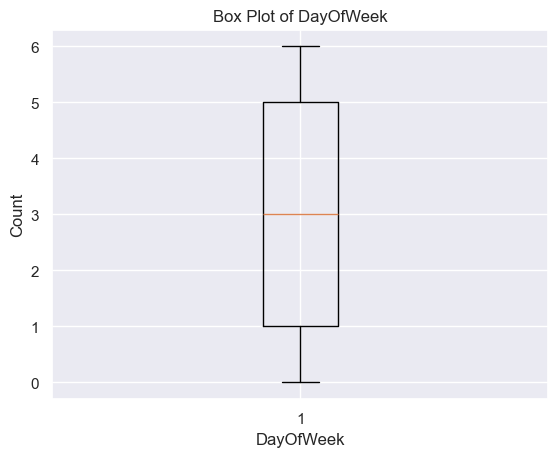

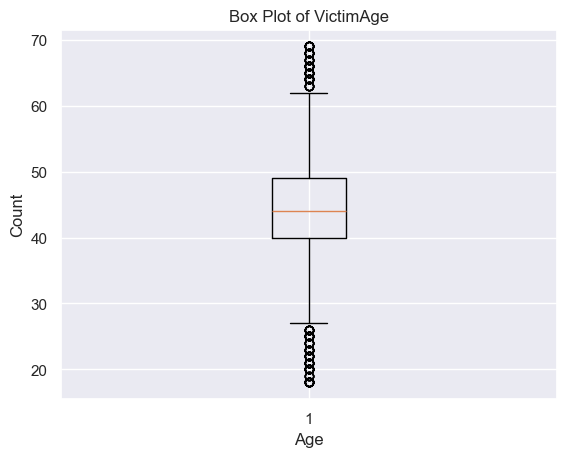

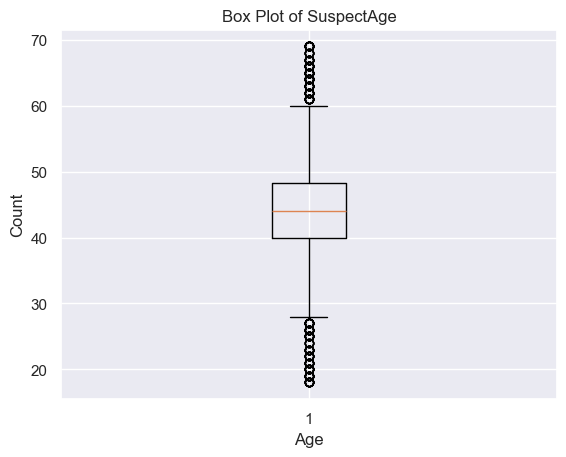

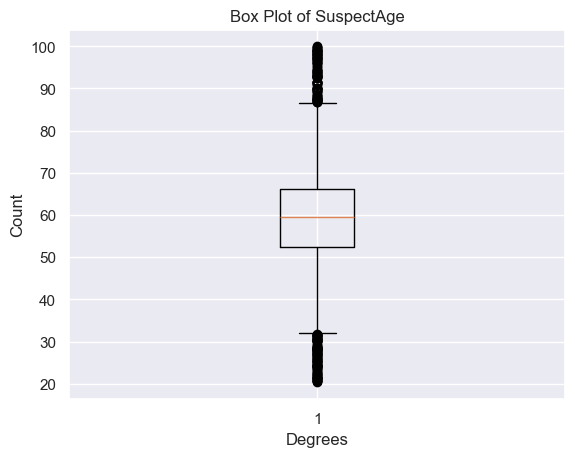

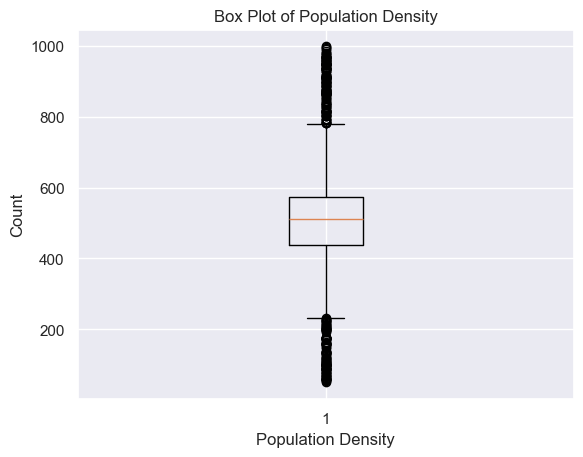

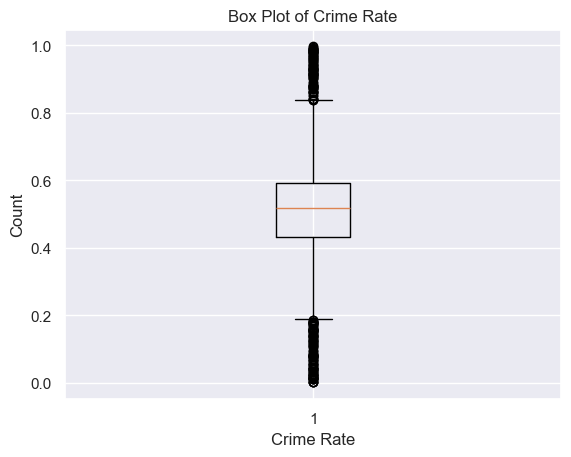

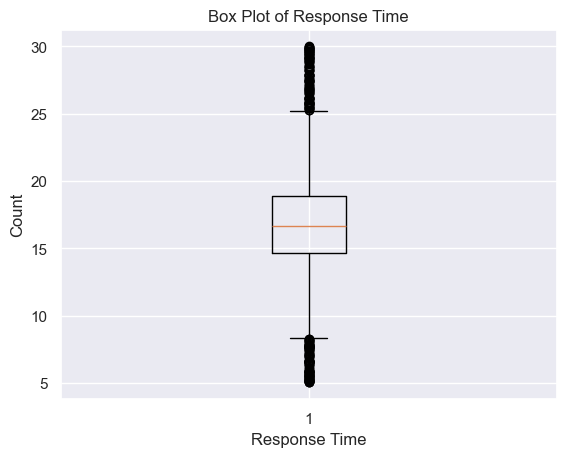

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df3["DayOfWeek"])
plt.xlabel("DayOfWeek")
plt.ylabel("Count")
plt.title("Box Plot of DayOfWeek")
plt.show()

plt.boxplot(df2["VictimAge"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Box Plot of VictimAge")
plt.show()

plt.boxplot(df2["SuspectAge"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Box Plot of SuspectAge")
plt.show()

plt.boxplot(df2["Temperature"])
plt.xlabel("Degrees")
plt.ylabel("Count")
plt.title("Box Plot of SuspectAge")
plt.show()

plt.boxplot(df2["PopulationDensity"])
plt.xlabel("Population Density")
plt.ylabel("Count")
plt.title("Box Plot of Population Density")
plt.show()

plt.boxplot(df2["CrimeRate"])
plt.xlabel("Crime Rate")
plt.ylabel("Count")
plt.title("Box Plot of Crime Rate")
plt.show()

plt.boxplot(df2["ResponseTime"])
plt.xlabel("Response Time")
plt.ylabel("Count")
plt.title("Box Plot of Response Time")
plt.show()


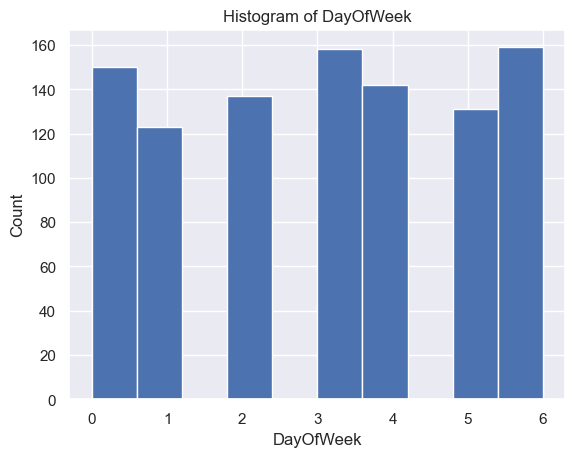

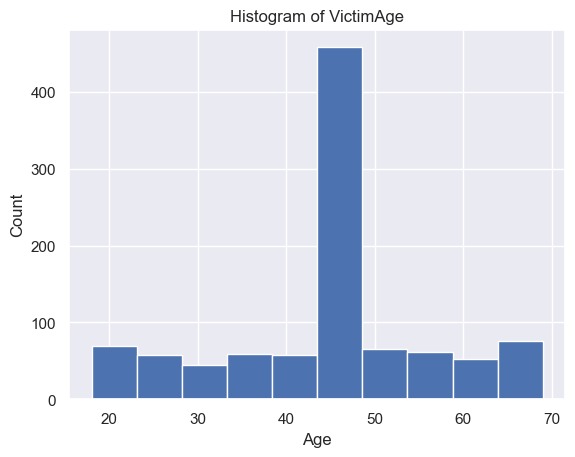

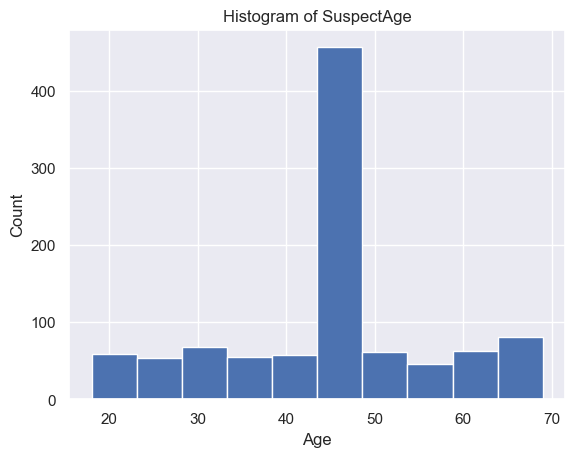

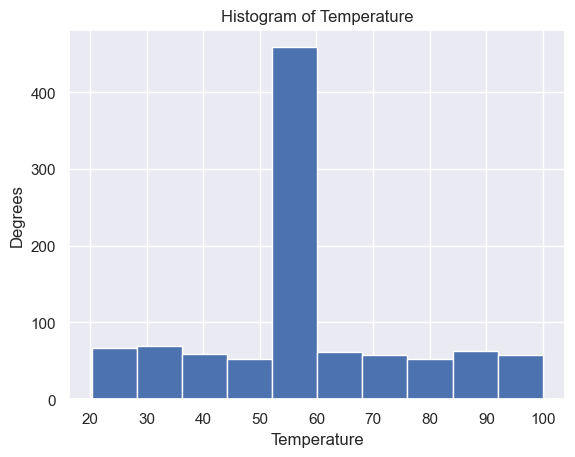

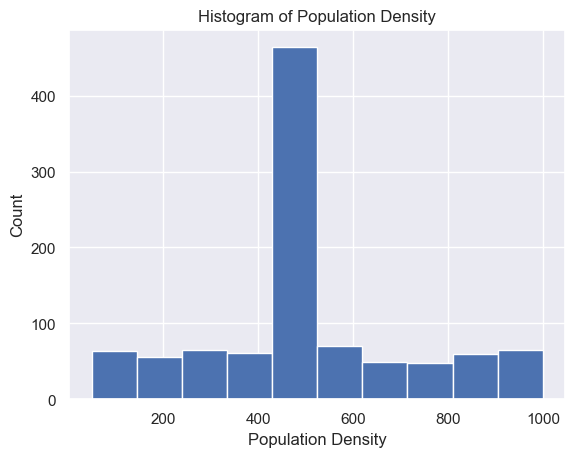

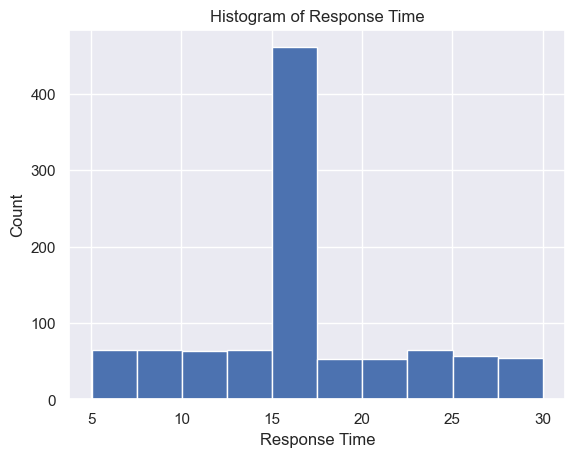

In [ ]:
plt.hist(df3["DayOfWeek"])
plt.xlabel("DayOfWeek")
plt.ylabel("Count")
plt.title("Histogram of DayOfWeek")
plt.show()

plt.hist(df2["VictimAge"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of VictimAge")
plt.show()

plt.hist(df2["SuspectAge"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of SuspectAge")
plt.show()

plt.hist(df2["Temperature"])
plt.xlabel("Temperature")
plt.ylabel("Degrees")
plt.title("Histogram of Temperature")
plt.show()

plt.hist(df2["PopulationDensity"])
plt.xlabel("Population Density")
plt.ylabel("Count")
plt.title("Histogram of Population Density")
plt.show()

plt.hist(df2["ResponseTime"])
plt.xlabel("Response Time")
plt.ylabel("Count")
plt.title("Histogram of Response Time")
plt.show()



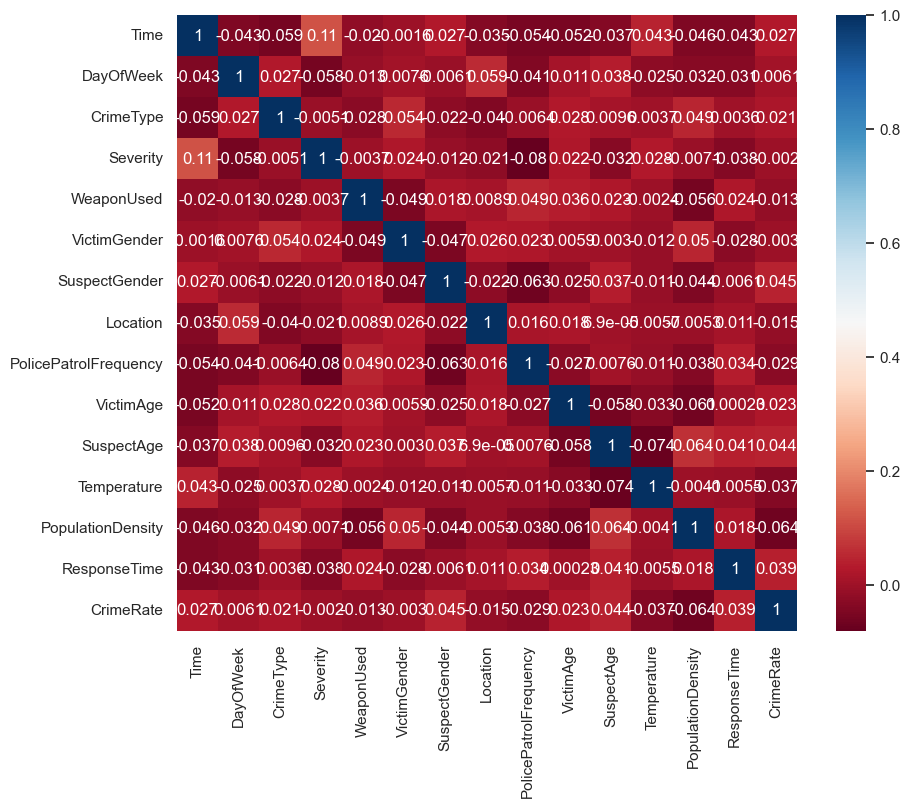

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df3.corr(), annot=True, cmap="RdBu")
plt.show()



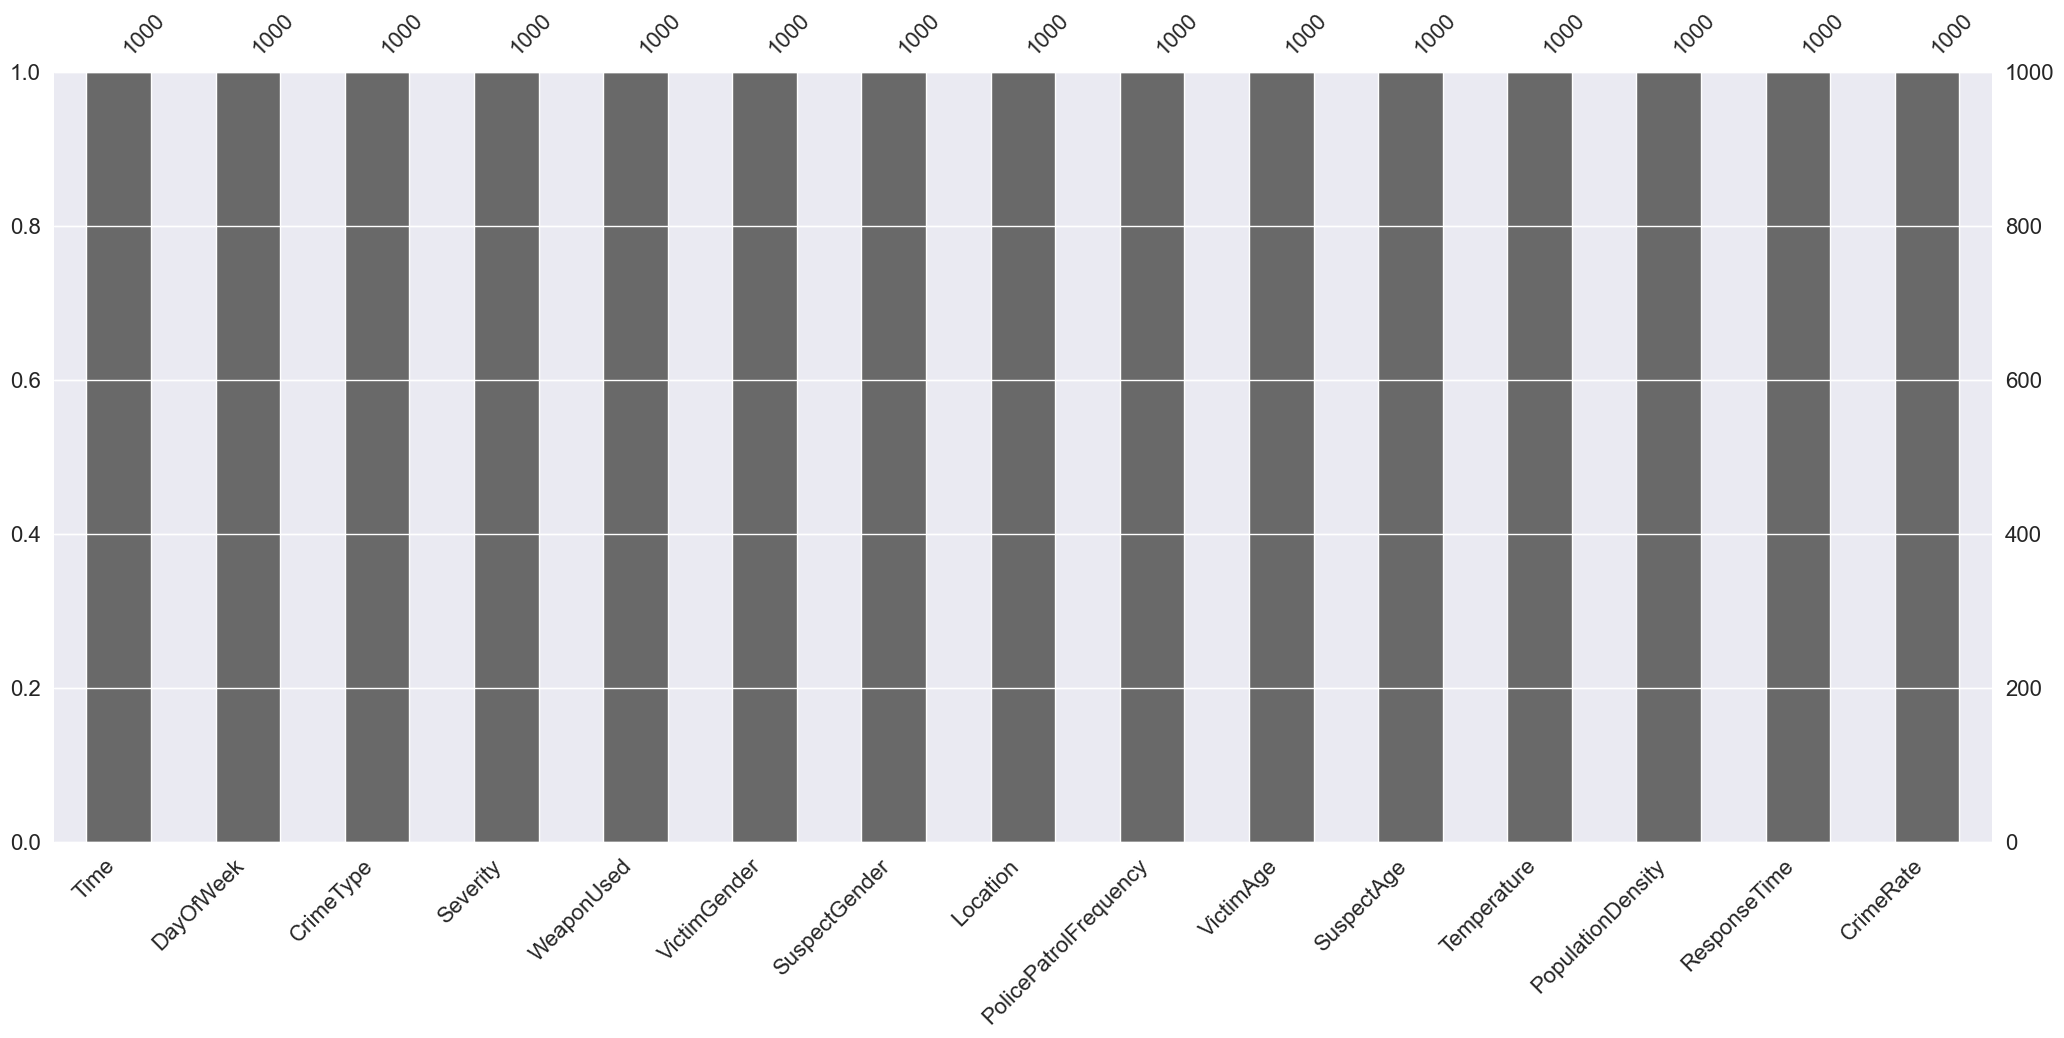

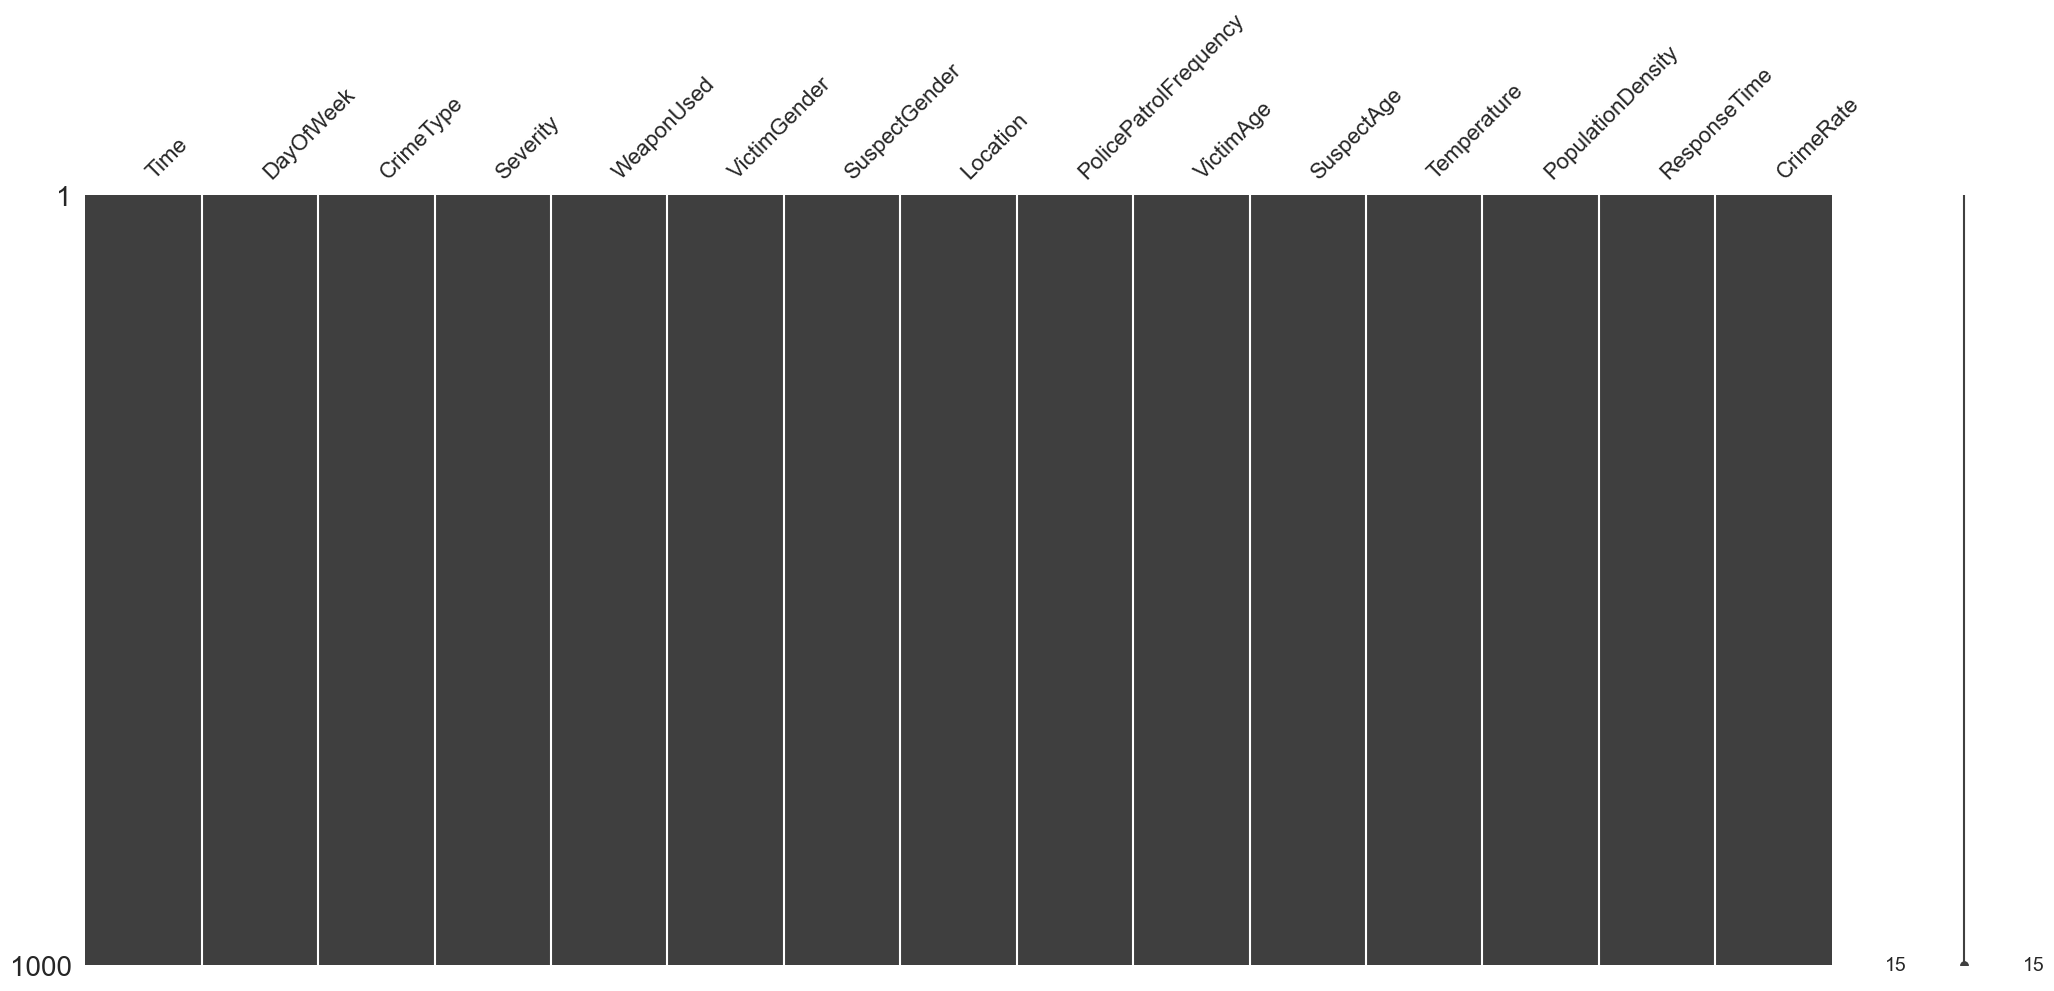

In [ ]:
import missingno as msno
msno.bar(df3)
plt.show()

msno.matrix(df3)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Define the binning intervals
age_bins = [18, 30, 40, 50, 60, 70]
temperature_bins = [20, 40, 60, 80, 100]
population_density_bins = [50, 200, 500, 1000]

# Apply binning transformation to numerical columns
df1['VictimAge'] = pd.cut(df1['VictimAge'], bins=age_bins, labels=False)
df1['Temperature'] = pd.cut(df1['Temperature'], bins=temperature_bins, labels=False)
df1['PopulationDensity'] = pd.cut(df1['PopulationDensity'], bins=population_density_bins, labels=False)

# Display the modified dataframe
print(df1)


          Date      Time  DayOfWeek CrimeType Severity WeaponUsed  VictimAge  \
0   2022-04-13  08:00 PM  Wednesday     Theft     High      Other        2.0   
1   2022-12-15  03:00 AM   Thursday   Assault     High      Knife        4.0   
2   2022-09-28  12:00 AM  Wednesday  Burglary   Medium      Knife        3.0   
3   2022-04-17  11:00 PM     Sunday     Theft     High    Firearm        2.0   
4   2022-03-13  08:00 AM     Sunday   Assault   Medium      Knife        0.0   
..         ...       ...        ...       ...      ...        ...        ...   
995 2022-06-10  06:00 PM     Friday  Burglary   Medium       None        1.0   
996 2022-06-27  09:00 AM     Monday   Assault     High      Knife        0.0   
997 2022-01-10  02:00 AM     Monday   Robbery      Low       None        1.0   
998 2022-09-18  07:00 AM     Sunday   Robbery      Low       None        3.0   
999 2022-05-18  03:00 AM  Wednesday     Theft      Low    Firearm        2.0   

    VictimGender  SuspectAge SuspectGen

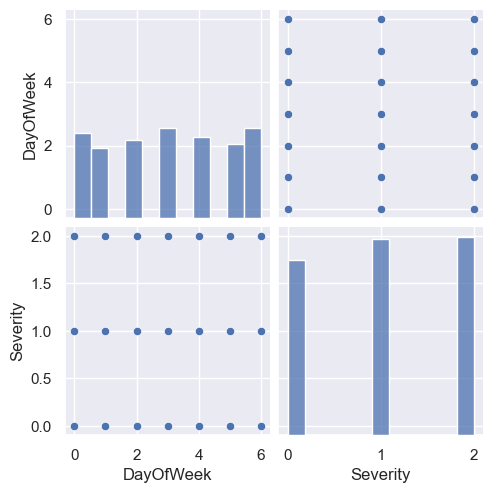

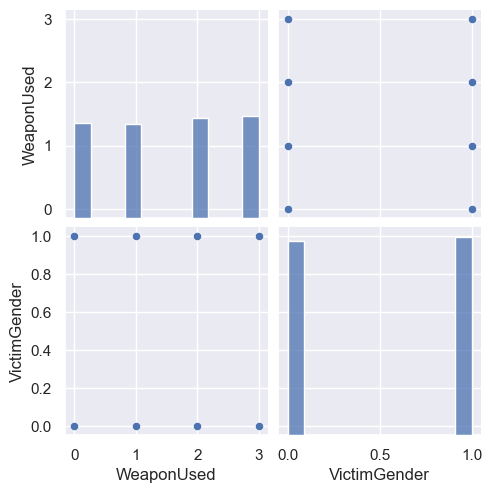

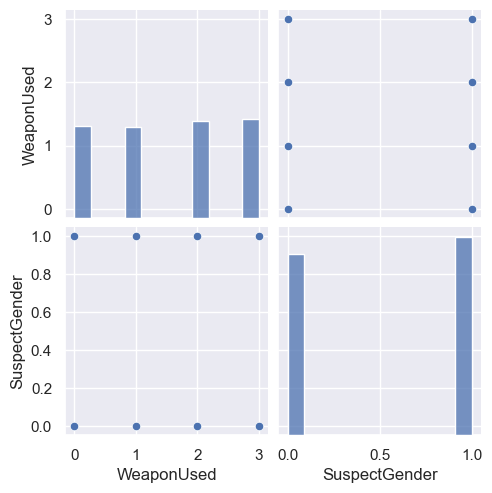

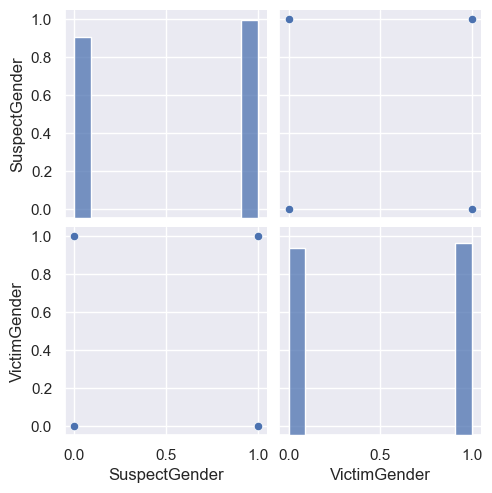

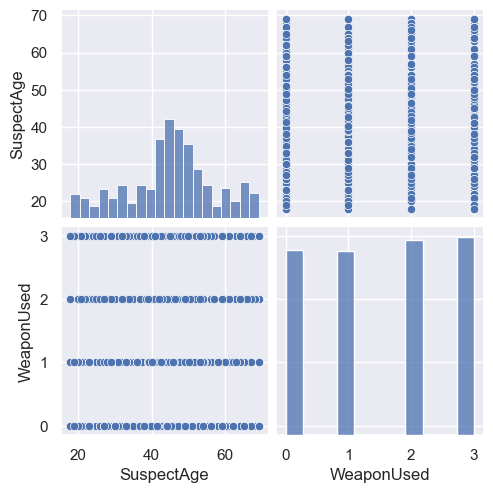

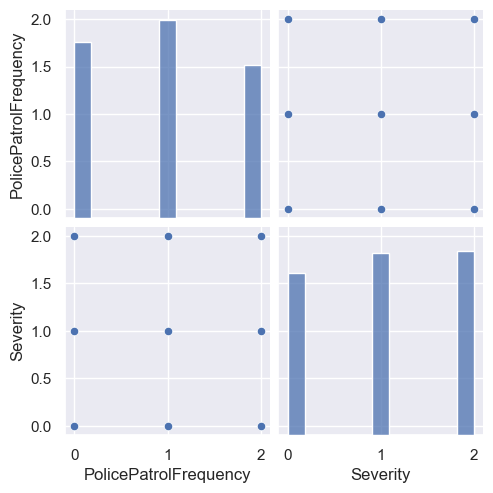

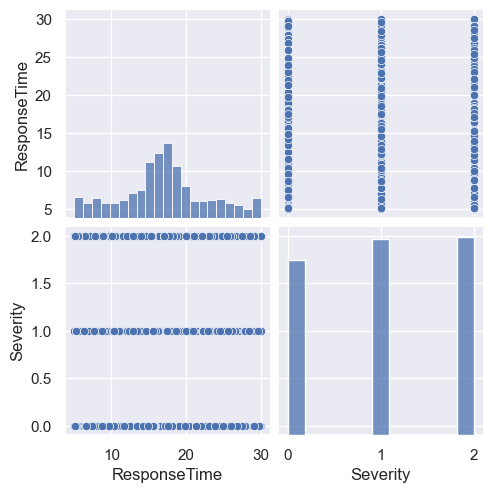

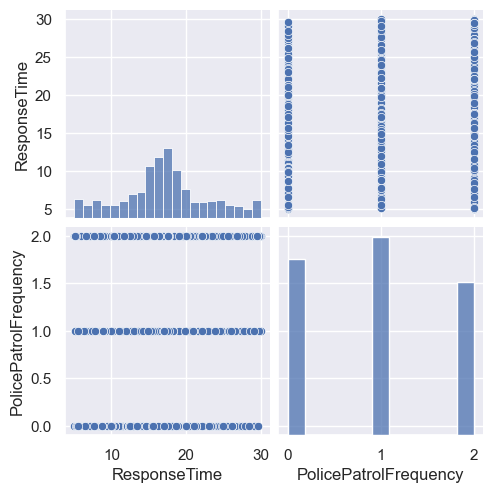

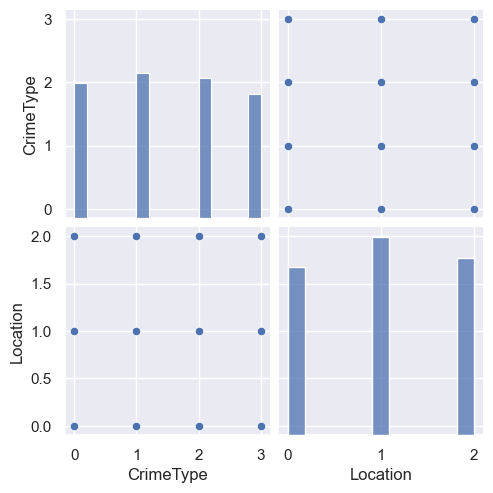

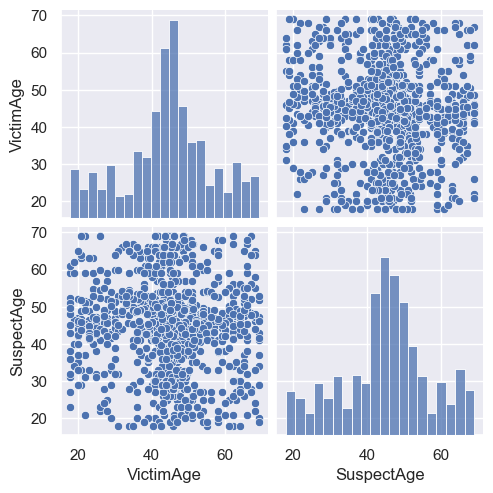

In [ ]:
import seaborn as sns

sns.pairplot(df3[['DayOfWeek', 'Severity']])
sns.pairplot(df3[['WeaponUsed', 'VictimGender']])
sns.pairplot(df3[['WeaponUsed', 'SuspectGender']])
sns.pairplot(df3[['SuspectGender', 'VictimGender']])
sns.pairplot(df3[['SuspectAge', 'WeaponUsed']])
sns.pairplot(df3[['PolicePatrolFrequency', 'Severity']])
sns.pairplot(df3[['ResponseTime', 'Severity']])
sns.pairplot(df3[['ResponseTime', 'PolicePatrolFrequency']])
sns.pairplot(df3[['CrimeType', 'Location']])
sns.pairplot(df3[['VictimAge', 'SuspectAge']])

<Axes: xlabel='PolicePatrolFrequency'>

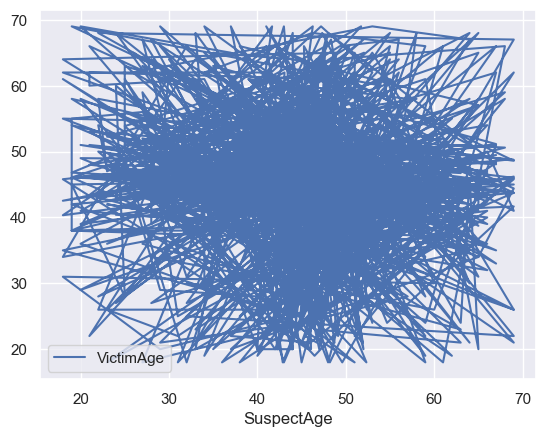

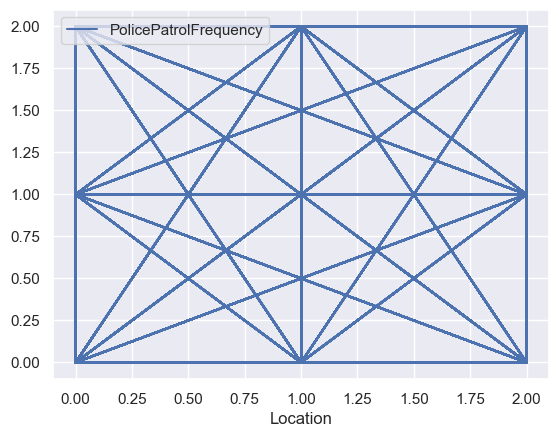

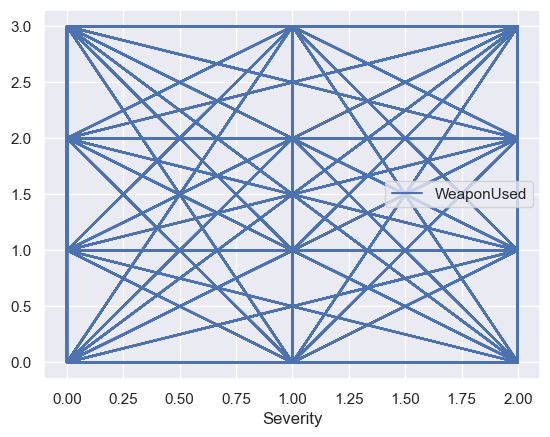

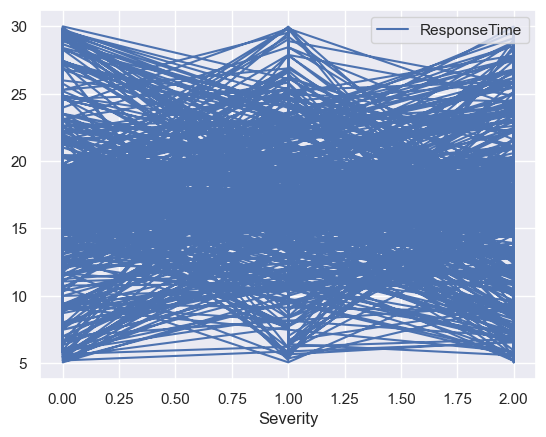

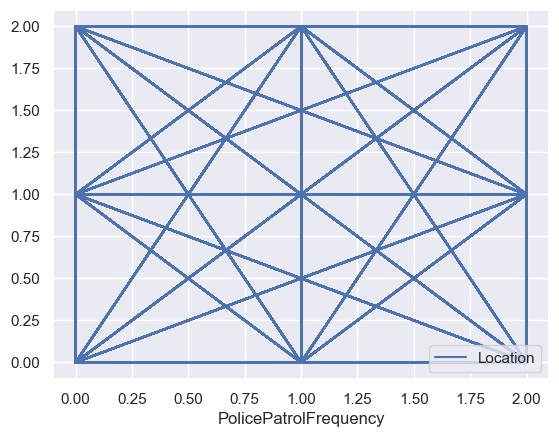

In [ ]:
df3.plot(x='SuspectAge', y='VictimAge', kind='line')
df3.plot(x='Location', y='PolicePatrolFrequency', kind='line')
df3.plot(x='Severity', y='WeaponUsed', kind='line')
df3.plot(x='Severity', y='ResponseTime', kind='line')
df3.plot(x='PolicePatrolFrequency', y='Location', kind='line')

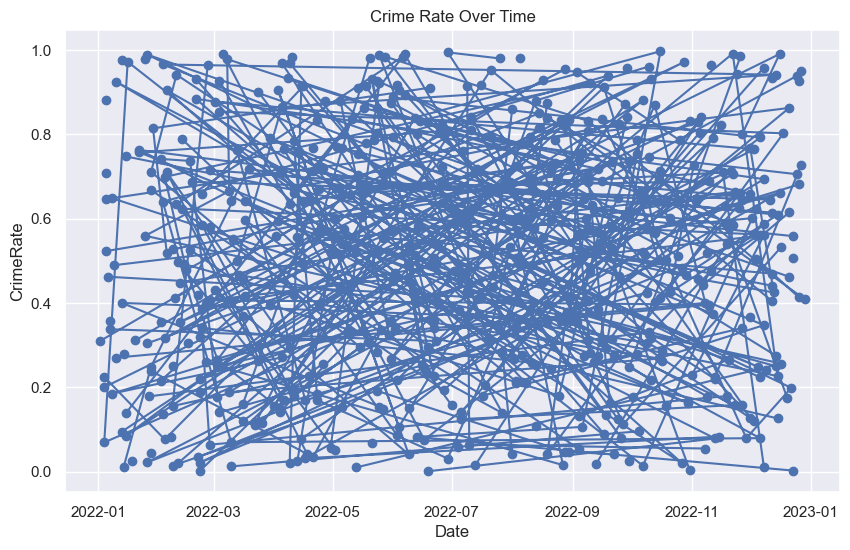

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Date' is a datetime column in crime_data
plt.figure(figsize=(10, 6))
plt.plot(crime_data['Date'], crime_data['CrimeRate'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('CrimeRate')
plt.title('Crime Rate Over Time')
plt.grid(True)
plt.show()


In [ ]:
def univariate(df,col,vartype,hue =None):
    '''
    Univariate function will plot parameter values in graphs.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuous or categorical
                Continuous(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : Only applicable in categorical analysis.
    '''
    sns.set(style="darkgrid")
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20))
        del temp
    else:
        exit
    plt.show()



C:\Users\Hriti\AppData\Local\Temp\ipykernel_18704\394565835.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax[0])
c:\Users\Hriti\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


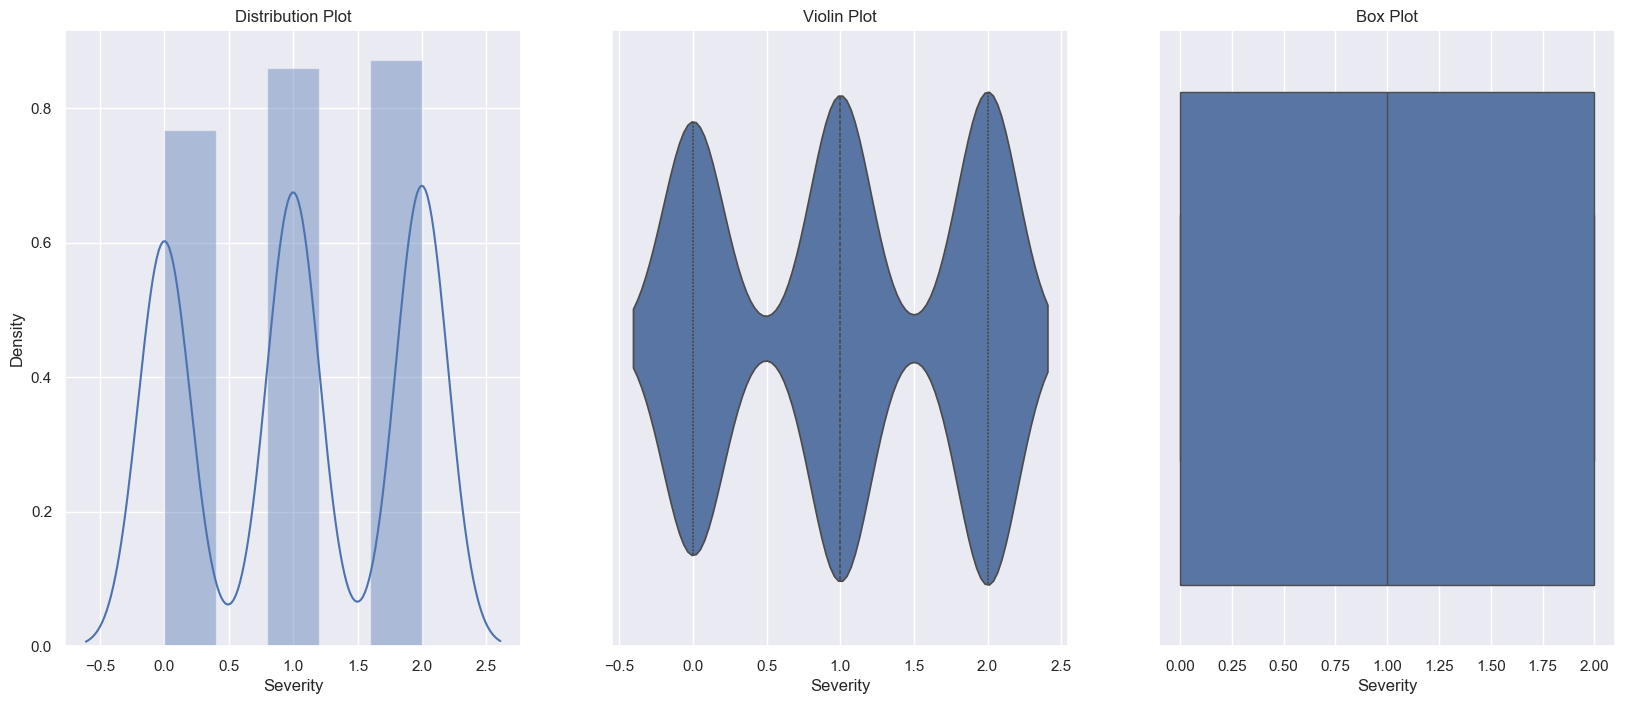

C:\Users\Hriti\AppData\Local\Temp\ipykernel_18704\394565835.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax[0])
c:\Users\Hriti\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


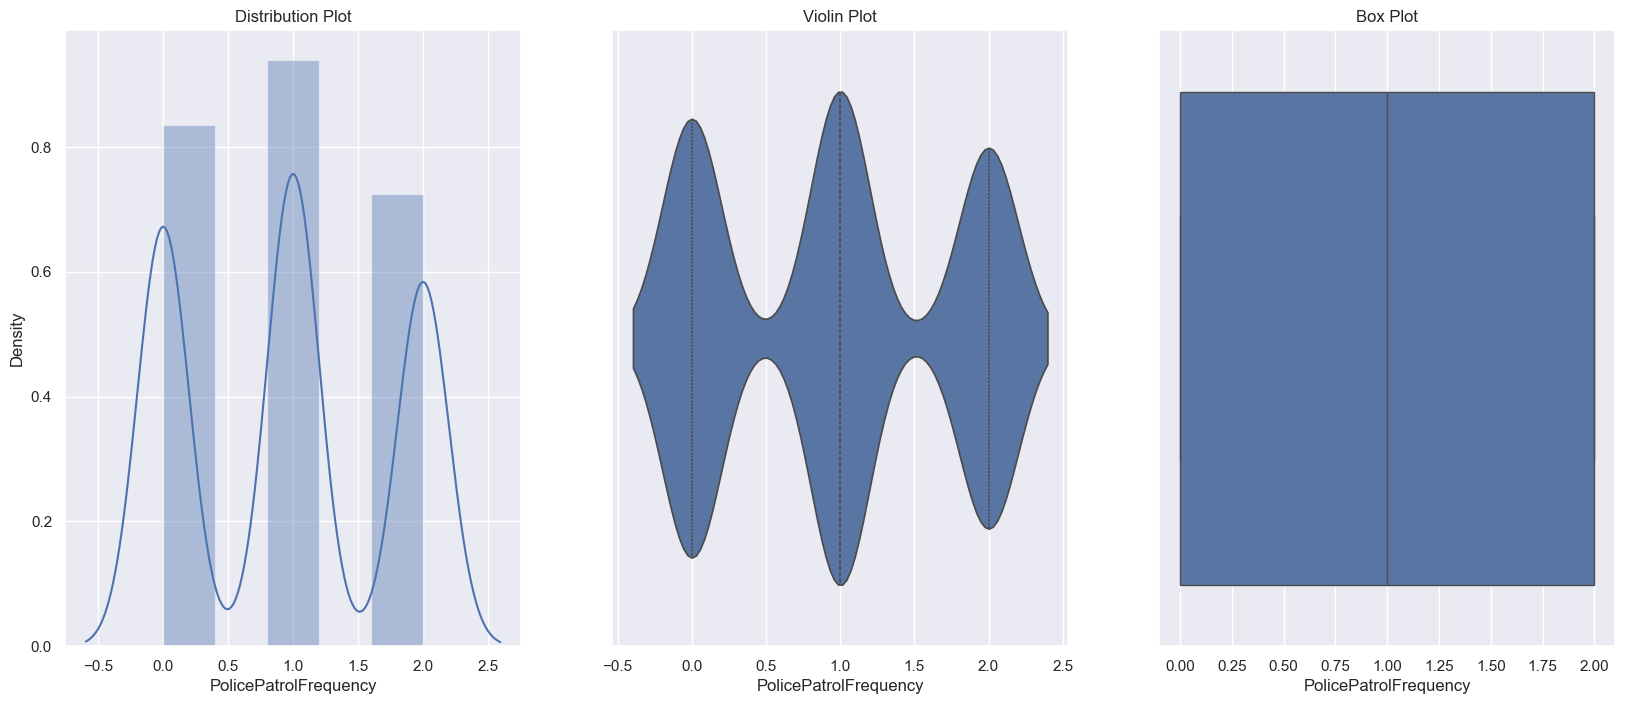

In [ ]:
univariate(df=df3,col='Severity',vartype=0)
univariate(df=df3,col='PolicePatrolFrequency',vartype=0)


EXPORTING THE DATASET

In [ ]:
import pandas as pd
df2.to_csv('crime_data_analysis.csv', index=False)